In [3]:
%matplotlib notebook
import os, sys
import logging
import random
import shutil
import time
import argparse
import numpy as np
import torch.nn as nn
import sigpy.plot as pl
import torch
import torchvision
from tensorboardX import SummaryWriter
from torch.nn import functional as F
from torch.utils.data import DataLoader
from utils.flare_utils import torch2np
import h5py
from utils.resnet2p1d import generate_model
# import matplotlib
# matplotlib.use('TkAgg')
import sigpy as sp
# UnrolledModelM = UnrolledModel
sys.path.append(os.path.dirname("/home/kewang/DCSNet/DCSNet_code/models/DCSNet/"))
from unet.unet_model import UNet3

# os.environ["CUDA_VISIBLE_DEVICES"]="9"
device = torch.device('cuda:2')
# device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [197]:
da = h5py.File("/home/kewang/DCSNet/DCSNet_data/Validate/data_bonn_23_4.h5", 'r')
MRF = np.array(da["MRF"])
T1 = np.array(da["T1"])
T2 = np.array(da["T2"])
FLAIR = np.array(da["FLAIR"])

In [198]:
#load the model
checkpoint_file = "/home/kewang/DCSNet/DCSNet_data/summary/train_DCSNet_UNet3D_data_7271_batchsize_3_adv_perceptual_conditional_01_01_nonorm/model_epoch126.pt"
checkpoint = torch.load(checkpoint_file,map_location=device)
model = UNet3(n_channels=1000, n_classes=1).to(device)
# args = checkpoint['args']
# args.device_num='-1'
# args.device='cpu'
# if args.modl_flag == True:
#     model = UnrolledModelM(args).to(device)
# else:
#     model = UnrolledModel(args).to(device)
model.load_state_dict(checkpoint['netG'])
print(checkpoint['epoch'])

126


In [199]:
MRF.shape

(500, 320, 320)

In [200]:
MRF_tensor = np.concatenate((MRF.real,MRF.imag))

In [201]:
MRF_input = torch.tensor(MRF_tensor[None,...],dtype=torch.float32).to(device)

In [202]:
with torch.no_grad():
    out = model(MRF_input)

In [203]:
out

(tensor([[[[ 0.0300,  0.0145,  0.0087,  ...,  0.0037,  0.0156,  0.0293],
           [ 0.0087,  0.0058,  0.0084,  ...,  0.0034,  0.0065,  0.0066],
           [ 0.0076,  0.0033,  0.0058,  ...,  0.0023,  0.0074,  0.0029],
           ...,
           [ 0.0079,  0.0043,  0.0042,  ..., -0.0004,  0.0037,  0.0036],
           [ 0.0186,  0.0046,  0.0062,  ...,  0.0031,  0.0072,  0.0091],
           [ 0.0173,  0.0040,  0.0059,  ...,  0.0044,  0.0094,  0.0315]]]],
        device='cuda:2'),
 tensor([[[[ 1.0638e-02,  3.6545e-03, -3.2726e-04,  ..., -4.5995e-04,
            -4.7108e-04,  2.2007e-03],
           [ 3.2841e-03,  2.9735e-04, -1.0259e-04,  ...,  6.2983e-04,
            -6.6508e-05, -3.5842e-03],
           [ 2.7548e-03, -7.8857e-04, -6.3659e-04,  ...,  2.8822e-03,
             1.8224e-03, -6.1687e-03],
           ...,
           [ 6.3899e-03,  3.3580e-03,  5.4965e-04,  ..., -5.7623e-04,
             1.4880e-03, -4.2093e-03],
           [ 8.4580e-03,  3.6666e-03, -1.6116e-04,  ..., -6.7178e

In [204]:
Fake.shape

(3, 320, 320)

In [205]:
T1_out = out[0].detach().cpu().numpy()
T2_out = out[1].detach().cpu().numpy()
FLAIR_out = out[2].detach().cpu().numpy()
Real = np.concatenate((T1[None,...],T2[None,...],FLAIR[None,...]))
Fake = np.concatenate((T1_out[0,...],T2_out[0,...],FLAIR_out[0,...]))
imag_all = np.concatenate((Real[None,...],Fake[None,...]))

<IPython.core.display.Javascript object>


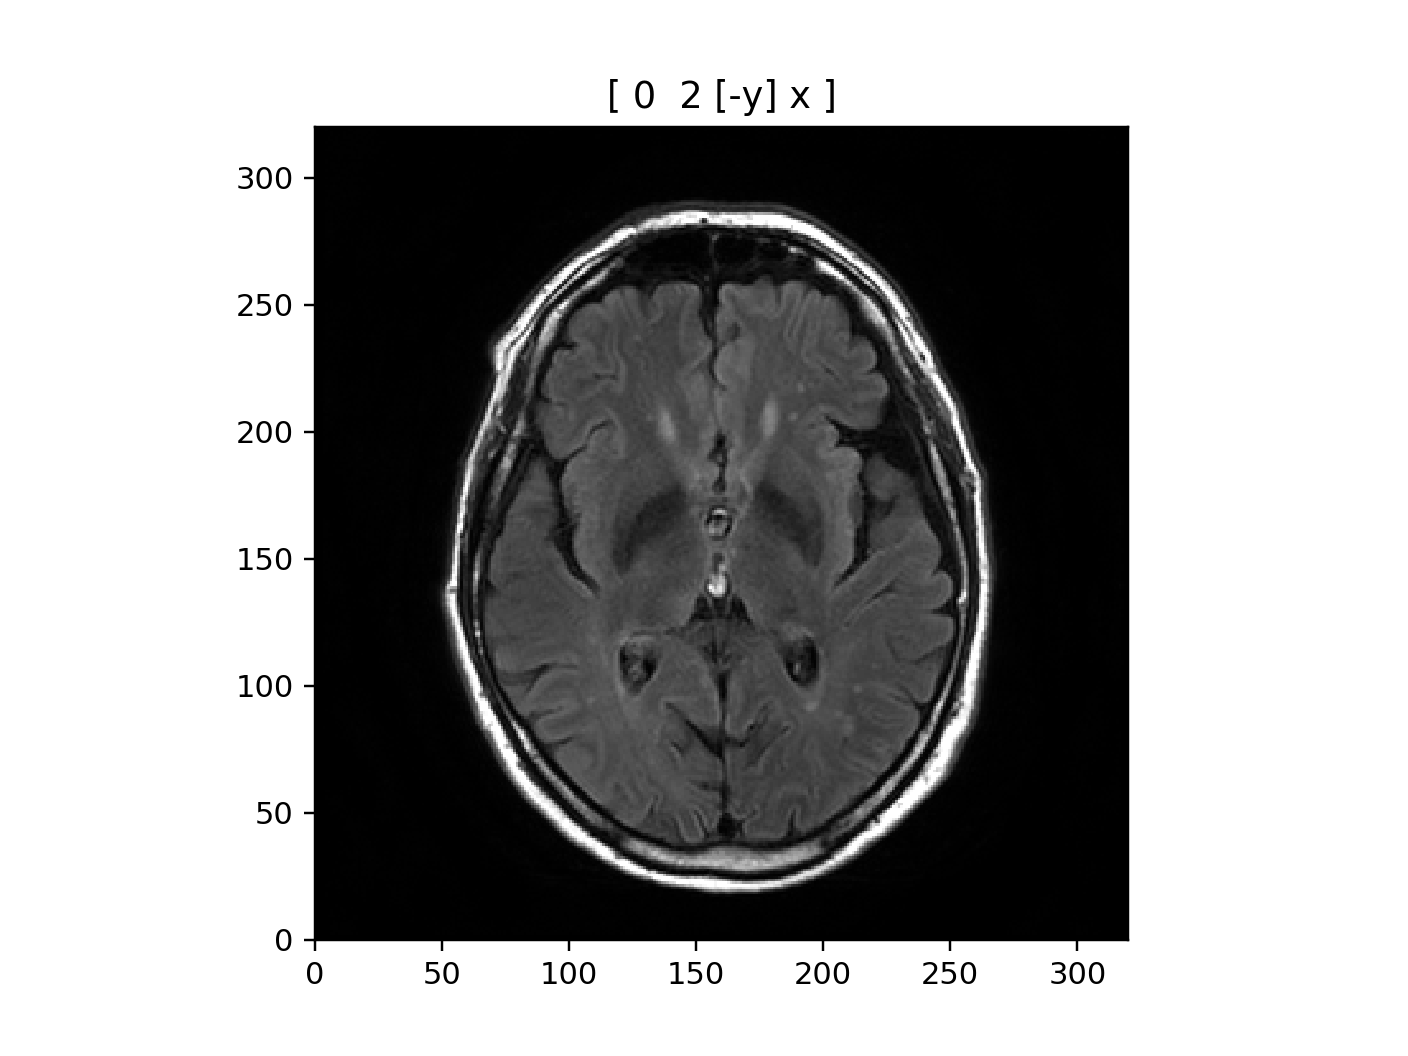

In [206]:
pl.ImagePlot(imag_all)

<IPython.core.display.Javascript object>


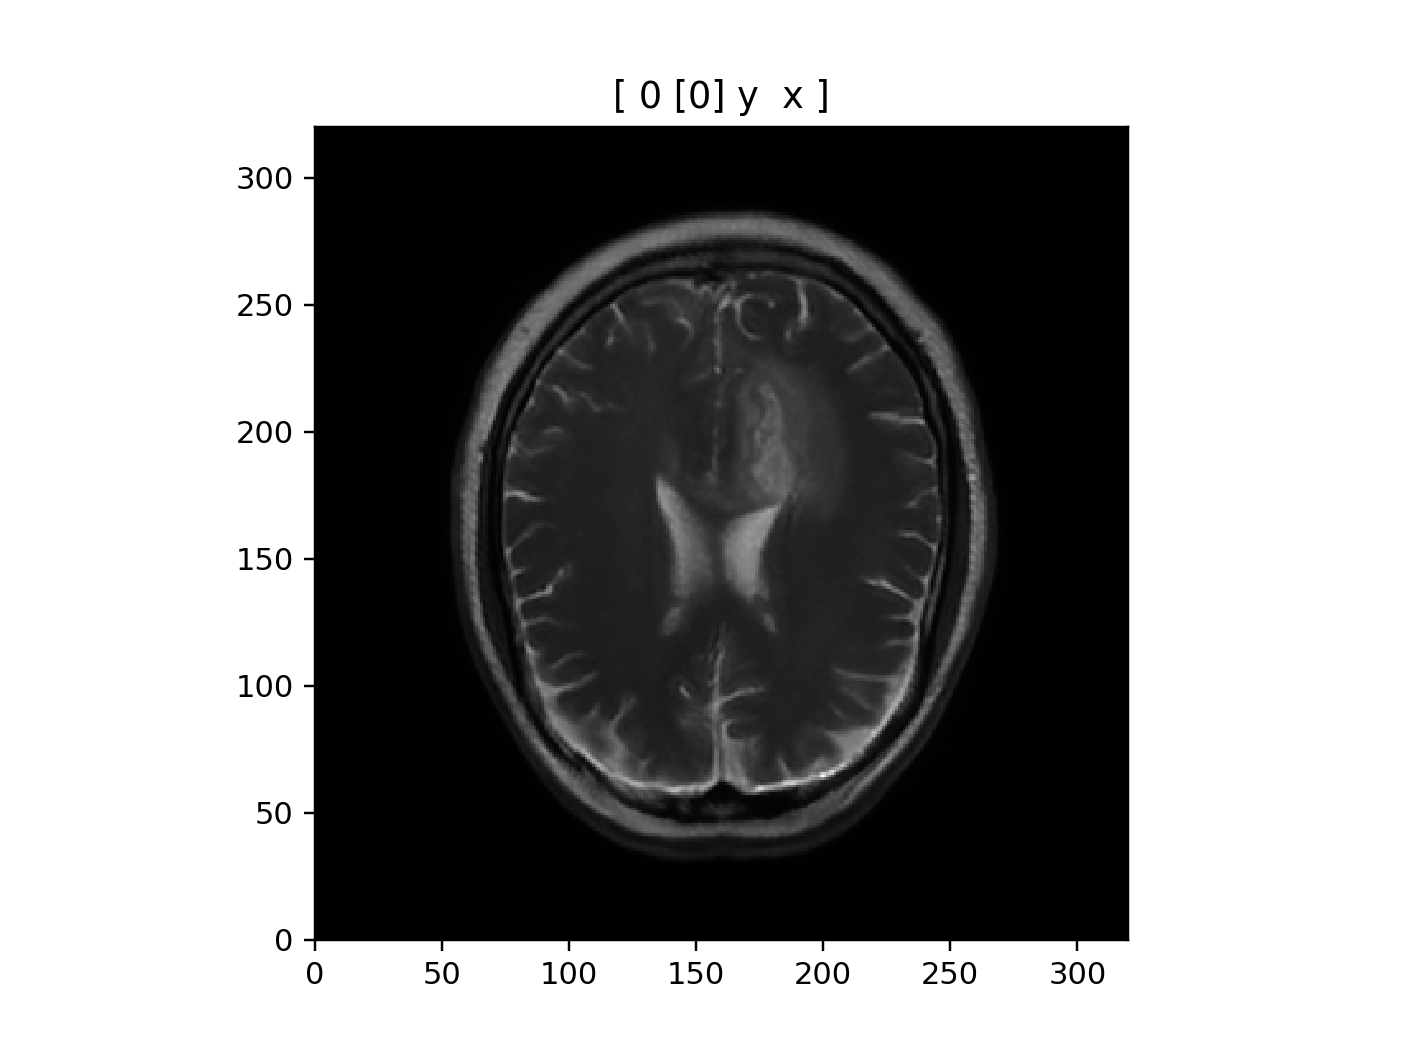

In [196]:
pl.ImagePlot(out[1].detach().cpu().numpy())